In [120]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

In [121]:
df_train = pd.read_csv('../dataset/train.csv', delimiter=";")
df_test = pd.read_csv('../dataset/test.csv', delimiter=";")

df_train.head(10)

,protocol,pkt_length,pkt_rate,pkt_count,ip_ttl,status
0,ICMP,70,500,25669,64,DDOS-Attack
1,UDP,74,5747,349635,64,DDOS-Attack
2,UDP,70,10272,614990,64,DDOS-Attack
3,ICMP,63,6184,372962,64,DDOS-Attack
4,UDP,65,1144,71663,64,DDOS-Attack
5,ICMP,66,1511,92318,64,DDOS-Attack
6,ICMP,67,500,33684,64,DDOS-Attack
7,UDP,92,2944,179001,64,DDOS-Attack
8,UDP,60,1000,55441,64,DDOS-Attack
9,ICMP,82,820,48447,64,DDOS-Attack


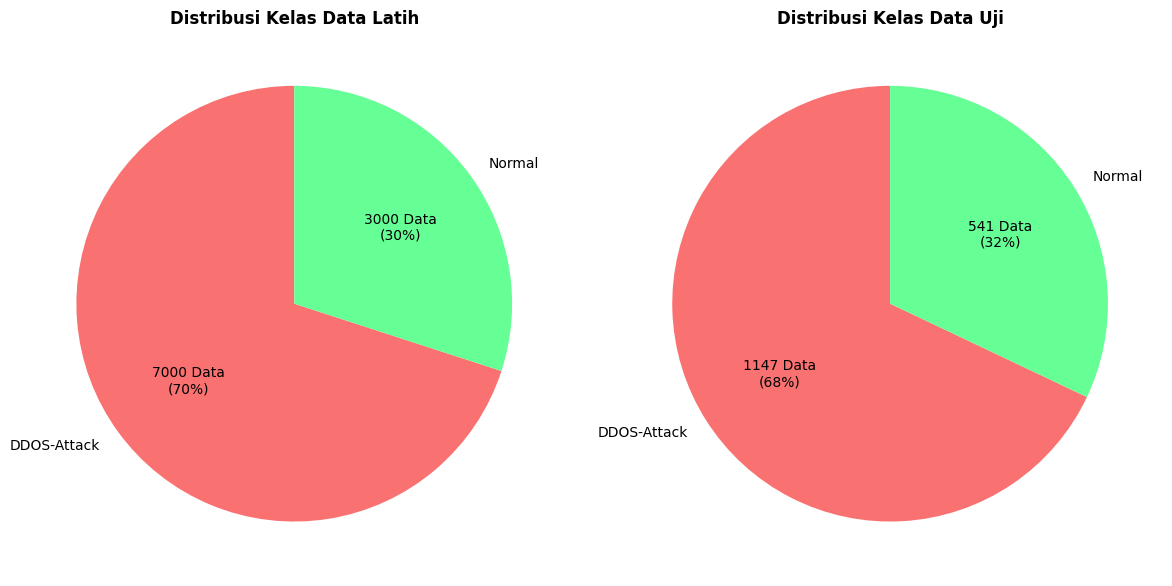

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

label_counts_train = df_train['status'].value_counts()
labels_train = label_counts_train.index
sizes_train = label_counts_train.values

axes[0].pie(
    sizes_train,
    labels=labels_train,
    autopct=lambda pct: f"{int(round(pct/100.*sum(sizes_train)))} Data\n({pct:.0f}%)",
    startangle=90,
    colors=["#fa7171", "#66ff96"]
)
axes[0].set_title("Distribusi Kelas Data Latih", fontsize=12, fontweight="bold")

label_counts_test = df_test['status'].value_counts()
labels_test = label_counts_test.index
sizes_test = label_counts_test.values

axes[1].pie(
    sizes_test,
    labels=labels_test,
    autopct=lambda pct: f"{int(round(pct/100.*sum(sizes_test)))} Data\n({pct:.0f}%)",
    startangle=90,
    colors=["#fa7171", "#66ff96"]
)
axes[1].set_title("Distribusi Kelas Data Uji", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

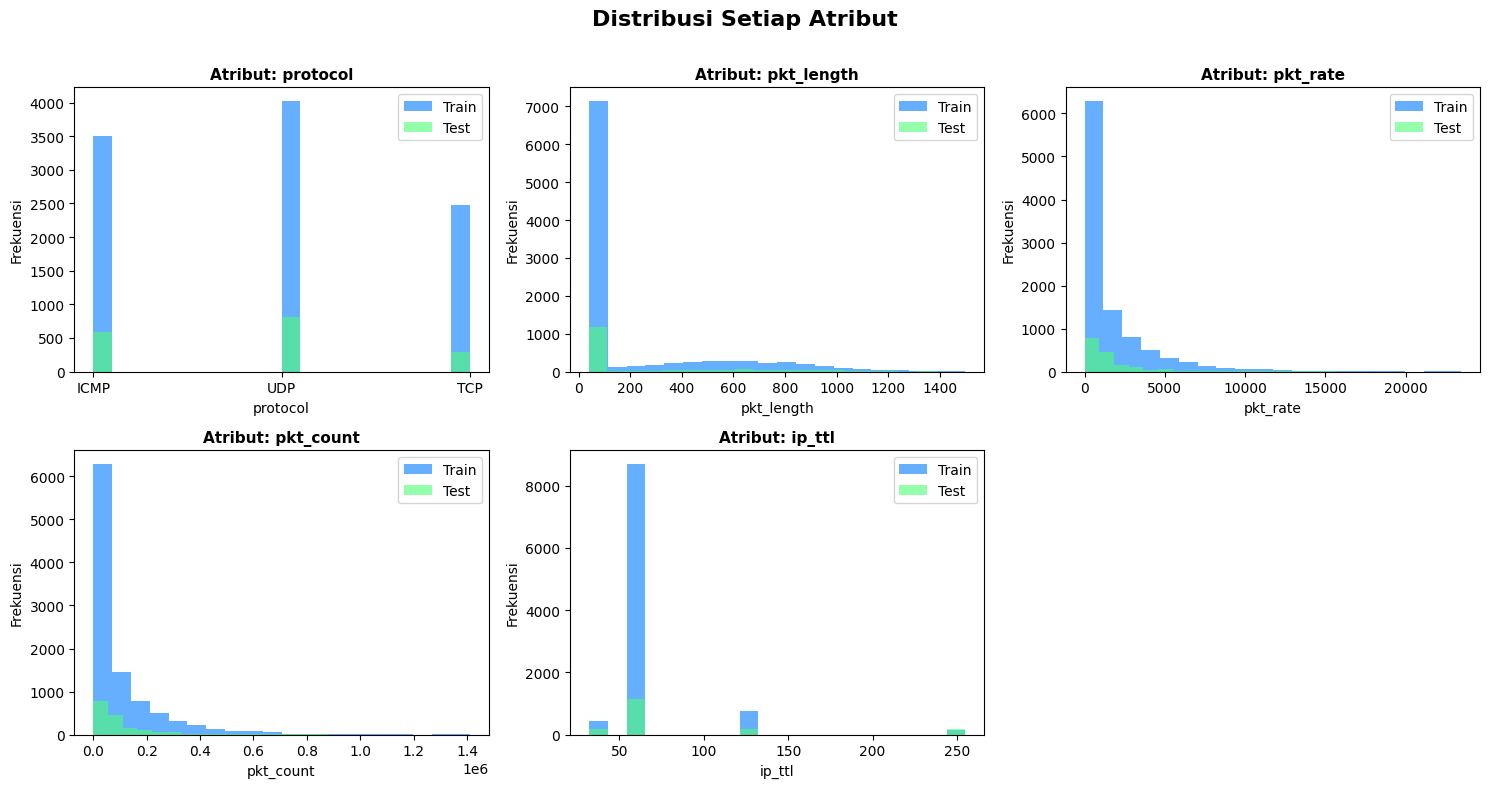

In [123]:
columns = df_train.columns[:-1]

num_cols = len(columns)
n_cols = 3
n_rows = int(np.ceil(num_cols / n_cols))

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    plt.hist(
        df_train[col],
        bins=20,
        alpha=0.6,
        label="Train",
        color="#007bff"  
    )
    
    plt.hist(
        df_test[col],
        bins=20,
        alpha=0.6,
        label="Test",
        color="#4dff74"  
    )
    
    plt.title(f"Atribut: {col}", fontsize=11, fontweight="bold")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.legend()

plt.suptitle("Distribusi Setiap Atribut", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [124]:
label_encoder = LabelEncoder()
df_train['status'] = label_encoder.fit_transform(df_train['status'])

protocol_encoder = LabelEncoder()
df_train['protocol'] = protocol_encoder.fit_transform(df_train['protocol'])

protocol_mapping = {'ICMP': 0, 'TCP': 1, 'UDP': 2}
df_test['protocol'] = df_test['protocol'].map(protocol_mapping)

status_mapping = {'DDOS-Attack': 0, 'Normal': 1}
df_test['status'] = df_test['status'].map(status_mapping)

In [125]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [126]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [127]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [128]:
def format_metric(value):
    if value in [0, 1]:
        return f"{value:.0f} (Presentase: {value*100:.0f}%)"
    else:
        return f"{value:.4f} (Presentase: {value*100:.2f}%)"

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy  = {format_metric(accuracy)}")
print(f"Precision = {format_metric(precision)}")
print(f"Recall    = {format_metric(recall)}")
print(f"F1-Score  = {format_metric(f1)}")

Accuracy  = 1 (Presentase: 100%)
Precision = 1 (Presentase: 100%)
Recall    = 1 (Presentase: 100%)
F1-Score  = 1 (Presentase: 100%)


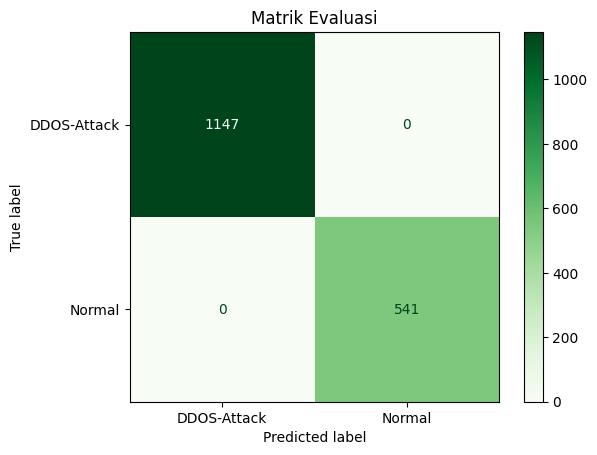

In [129]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=label_encoder.classes_)
disp.plot(cmap='Greens')
plt.title("Matrik Evaluasi")
plt.show()

In [130]:
# joblib.dump(model, 'result/ddos_model.pkl')
# joblib.dump(label_encoder, 'result/label_encoder.pkl')

# print("\nModel dan preprocessor disimpan!")